# Assignment 2 - Geopandas

Create a map that visualizes the preferences of cities/municipalities between Jollibee and Mcdonalds in 'Metropolitan Manila'. Your map should distinctly show:
1. The locations of the Jollibee and Mcdonalds Establishments
1. The "preference" between the two
1. The bottom two cities in terms of number of restaurants/population

In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-65rf4vuc because the default path (/home/jrjimenez/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## McDonalds and Jollibee Location Data

In [2]:
# Your Code Here
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

In [3]:
mm_pts = gpd.read_postgis('''
SELECT name_2 as city, name, way
FROM gadm.ph as g
JOIN public.ph_point as p ON st_within(st_transform(p.way, 3123), st_transform(g.geom, 3123))
WHERE g.name_1 = 'Metropolitan Manila' AND
        (p.name LIKE 'Jol%ibee%' OR p.name LIKE 'Mc%onal%' OR
        p.name LIKE 'jol%ibee%' OR p.name LIKE 'mc%onal%')''', con = conn, geom_col = 'way')
mm_pts

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,city,name,way
0,Muntinlupa,Jollibee,POINT (121.04576 14.37747)
1,Muntinlupa,McDonald's,POINT (121.04599 14.37776)
2,Muntinlupa,Jollibee,POINT (121.04510 14.38967)
3,Muntinlupa,Jollibee,POINT (121.03830 14.39326)
4,Muntinlupa,McDonald's,POINT (121.04504 14.39448)
...,...,...,...
412,Marikina,Jollibee,POINT (121.11684 14.64984)
413,Marikina,McDonalds C&B Mall,POINT (121.11579 14.65034)
414,Marikina,jollibee,POINT (121.11336 14.65931)
415,Marikina,Jollibee,POINT (121.11345 14.65943)


In [4]:
mcdo = gpd.read_postgis('''
SELECT name_2 as city, name, way
FROM gadm.ph as g
JOIN public.ph_point as p ON st_within(st_transform(p.way, 3123), st_transform(g.geom, 3123))
WHERE g.name_1 = 'Metropolitan Manila' AND
        (p.name LIKE 'Mc%onal%' OR p.name LIKE 'mc%onal%')''', con = conn, geom_col = 'way')
mcdo

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,city,name,way
0,Muntinlupa,McDonald's,POINT (121.04599 14.37776)
1,Muntinlupa,McDonald's,POINT (121.04504 14.39448)
2,Muntinlupa,McDonald's,POINT (121.04639 14.41155)
3,Las Piñas,McDonalds Moonwalk Las Piñas Parking,POINT (121.00261 14.42706)
4,Las Piñas,McDonald's,POINT (121.01070 14.43401)
...,...,...,...
153,Quezon City,McDonald's regalado,POINT (121.06989 14.70673)
154,Quezon City,McDonald's,POINT (121.05587 14.73600)
155,Quezon City,Mc Donalds lagro,POINT (121.06446 14.73514)
156,Marikina,McDonald's,POINT (121.11661 14.65011)


In [5]:
jollibee = gpd.read_postgis('''
SELECT name_2 as city, name, way
FROM gadm.ph as g
JOIN public.ph_point as p ON st_within(st_transform(p.way, 3123), st_transform(g.geom, 3123))
WHERE g.name_1 = 'Metropolitan Manila' AND
        (p.name LIKE 'Jol%ibee%' OR p.name LIKE 'jol%ibee%')''', con = conn, geom_col = 'way')
jollibee

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,city,name,way
0,Muntinlupa,Jollibee,POINT (121.04576 14.37747)
1,Muntinlupa,Jollibee,POINT (121.04510 14.38967)
2,Muntinlupa,Jollibee,POINT (121.03830 14.39326)
3,Muntinlupa,Jollibee,POINT (121.04499 14.39760)
4,Muntinlupa,Jollibee,POINT (121.04657 14.41180)
...,...,...,...
254,Kalookan City,Jollibee,POINT (121.05982 14.75631)
255,Marikina,Jollibee,POINT (121.11684 14.64984)
256,Marikina,jollibee,POINT (121.11336 14.65931)
257,Marikina,Jollibee,POINT (121.11345 14.65943)


## Locations of Jollibee and McDonalds establishments in 'Metropolitan Manila'

/opt/conda/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:>

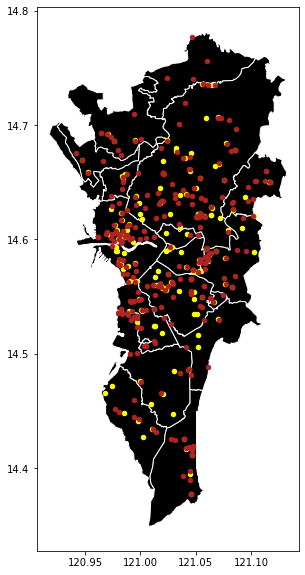

In [7]:
ph_shp = gpd.read_postgis('''
SELECT *
from gadm.ph
''',con=conn,geom_col = 'geom')
mm_shp = ph_shp[ph_shp['name_1']=='Metropolitan Manila']
ax = mm_shp.plot(figsize = (10,10),color='black',edgecolor='white')
mcdo.plot(ax=ax,color='yellow',markersize=20)
jollibee.plot(ax=ax,color='firebrick',markersize=20)

## 'Preference' between the two

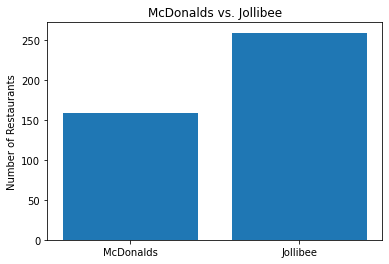

In [8]:
x_axis = ['McDonalds', 'Jollibee']
y_axis = [len(mcdo.index), len(jollibee.index)]

plt.bar(x_axis, y_axis)
plt.title('McDonalds vs. Jollibee')
plt.ylabel('Number of Restaurants')
plt.show()

In [9]:
resto_counts = mm_pts['city'].value_counts().rename_axis('city').reset_index(name='counts')
resto_counts

,city,counts
0,Quezon City,103
1,Manila,73
2,Makati City,46
3,Pasay City,32
4,Pasig City,31
5,Parañaque,23
6,Muntinlupa,19
7,Marikina,16
8,Mandaluyong,14
9,Las Piñas,13


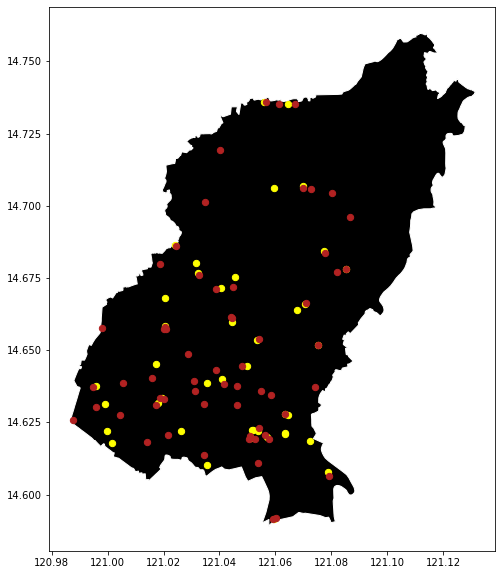

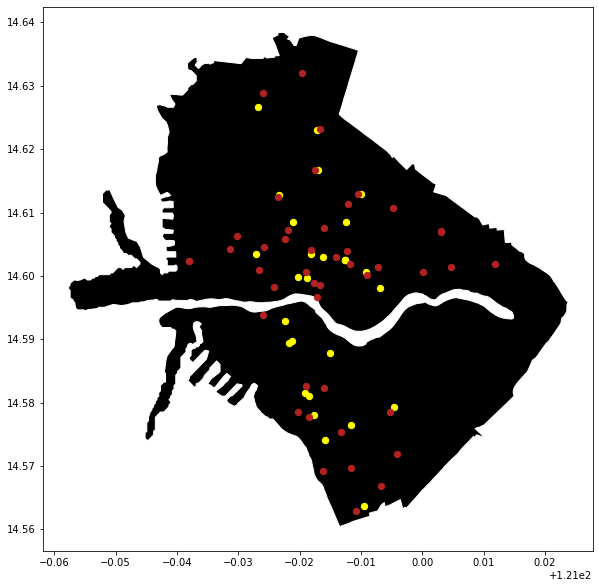

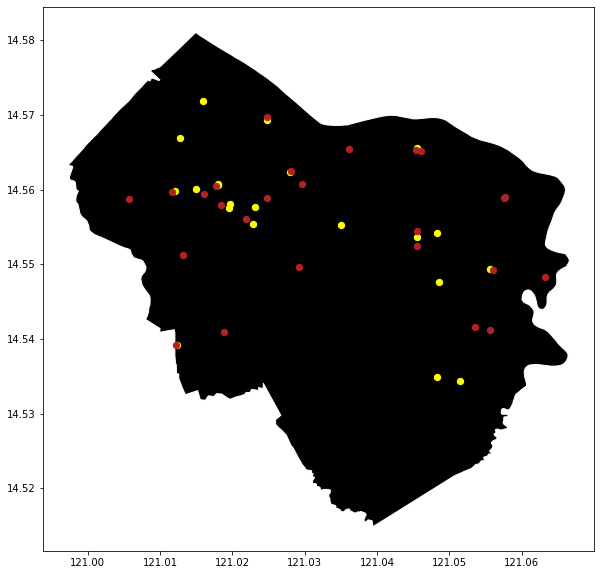

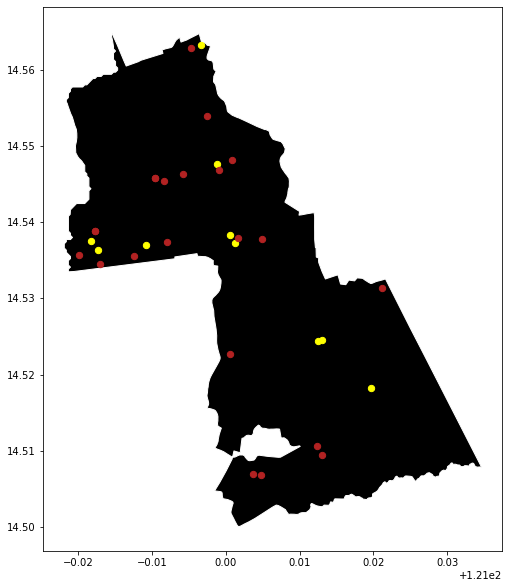

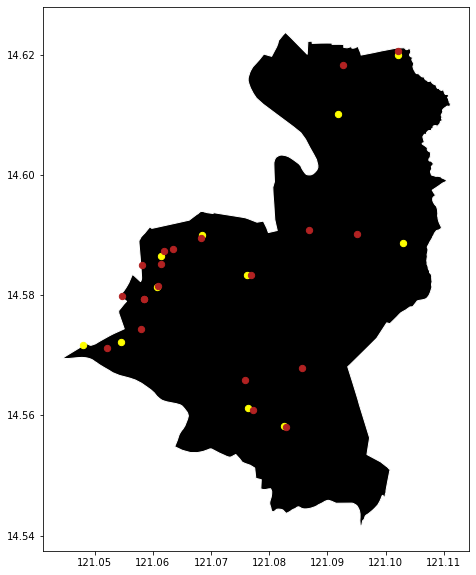

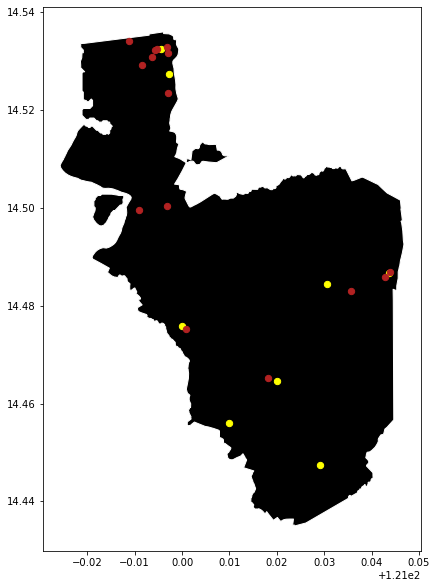

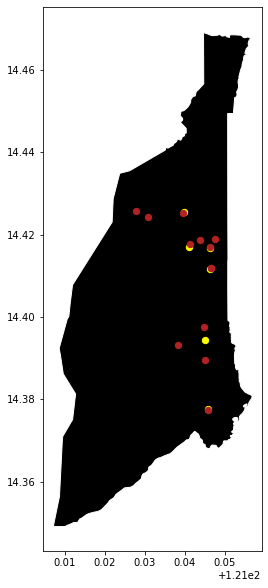

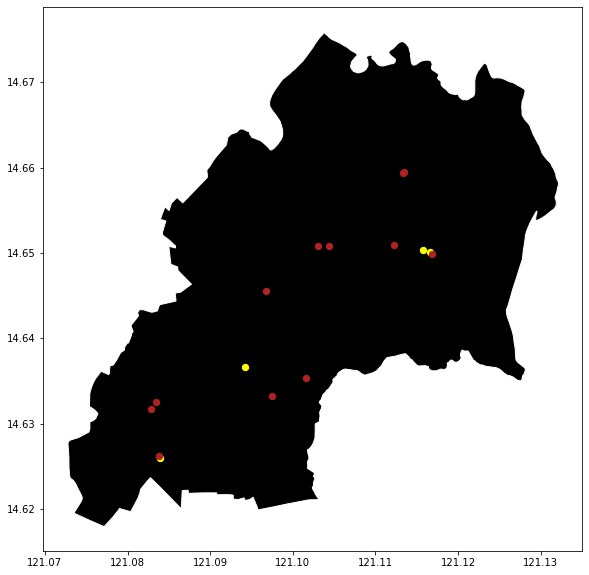

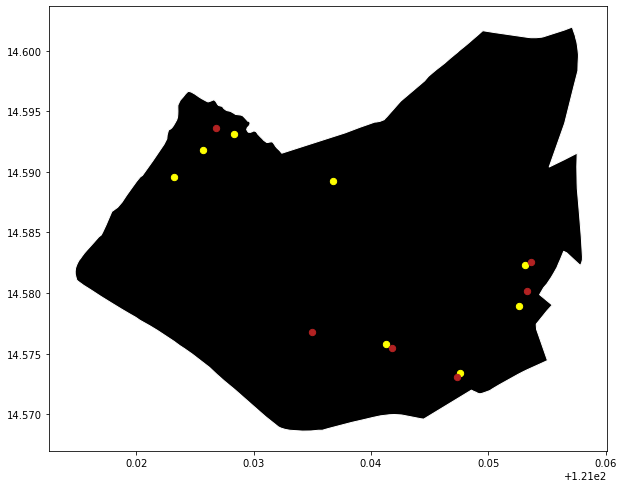

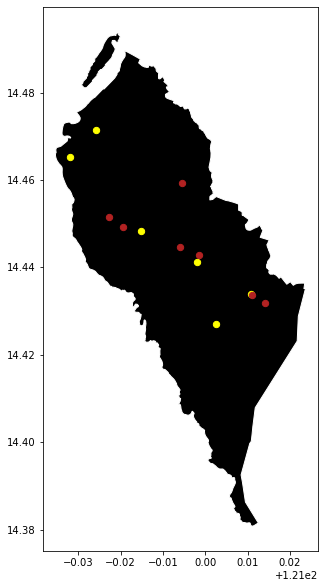

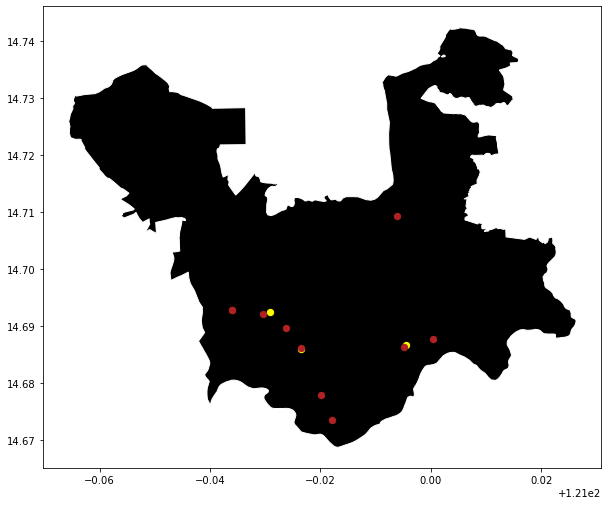

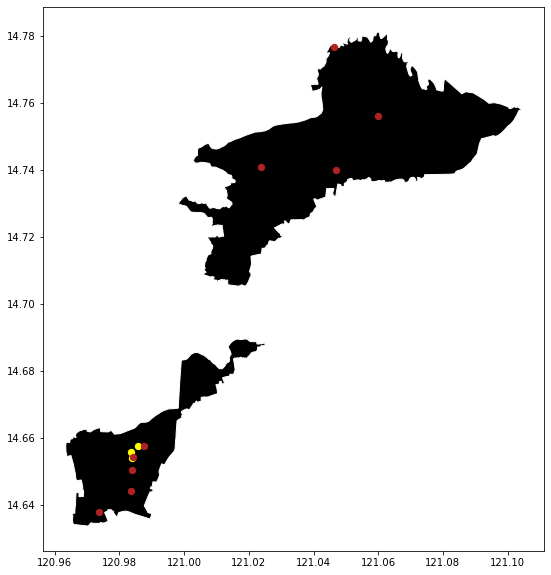

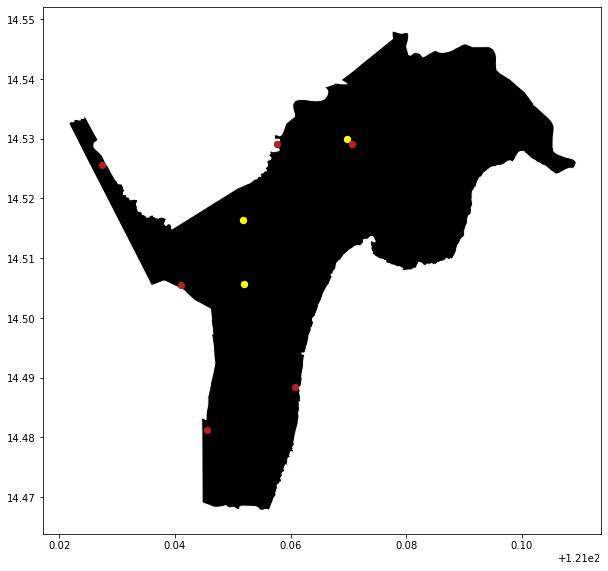

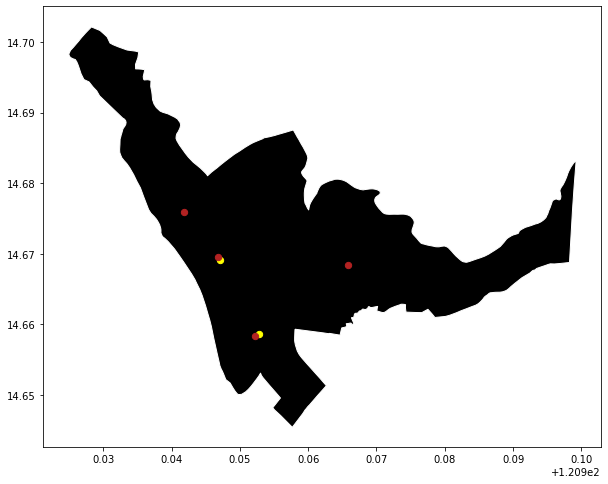

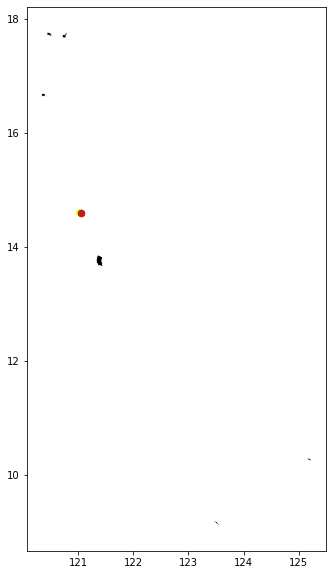

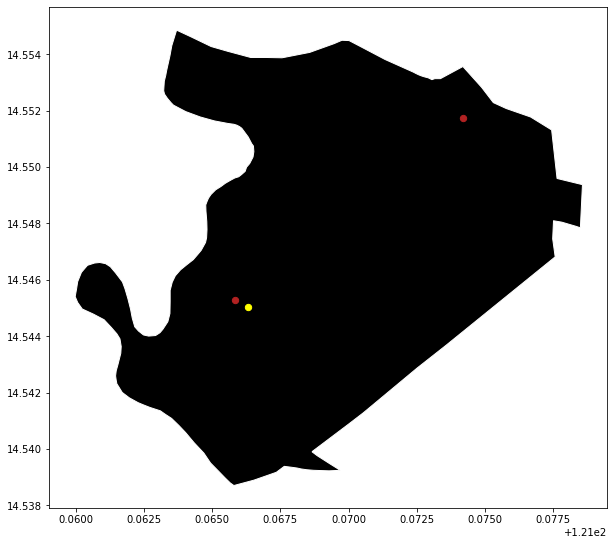

In [10]:
for c in resto_counts['city']:
    city_shp = ph_shp[ph_shp['name_2']==c]
    ax = city_shp.plot(figsize = (10,10),color='black',edgecolor='white')
    mcdo[mcdo['city'].str.contains(str(c), na = False)].plot(ax=ax,color='yellow',markersize=40)
    jollibee[jollibee['city'].str.contains(str(c), na = False)].plot(ax=ax,color='firebrick',markersize=40)

Jollibee seems to be more preferred than McDonalds generally.

## The bottom two cities in terms of number of restaurants/population

In [11]:
resto_counts

,city,counts
0,Quezon City,103
1,Manila,73
2,Makati City,46
3,Pasay City,32
4,Pasig City,31
5,Parañaque,23
6,Muntinlupa,19
7,Marikina,16
8,Mandaluyong,14
9,Las Piñas,13


In [12]:
fin_pop = pd.read_csv('financial_pop.csv')
fin_pop

,pop,tot_local_sources,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,48163.0,74.045920,36.556294,230.577076,206.848717,23.728359,0.0,16.202464,21.181116,15.758681,Abra,Bangued
1,3573.0,0.115667,0.035633,56.689883,54.409910,2.279973,0.0,0.000000,0.030000,20.369743,Abra,Boliney
2,17115.0,1.736411,1.019565,93.647242,66.222389,27.424853,0.0,19.560034,20.792182,6.632671,Abra,Bucay
3,2501.0,0.273689,0.129150,44.789104,29.633181,15.155923,0.0,0.479569,0.656569,24.348356,Abra,Bucloc
4,2088.0,0.643801,0.277660,51.242322,47.848486,3.393836,0.0,0.000000,0.000000,6.511575,Abra,Daguioman
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,NaN,15.448920,5.801291,165.833472,116.742464,49.091008,0.0,30.375550,40.505854,29.068270,Camarines Sur,Tinambac
1623,NaN,3.881869,2.064453,59.176489,50.055428,9.121061,0.0,0.000000,0.000000,33.135557,Camarines Sur,Camaligan
1624,NaN,4.867135,2.615213,144.692431,100.076373,44.616059,0.0,0.502352,0.502352,106.534443,Camarines Sur,Lagonoy
1625,NaN,5.261260,1.360630,95.936120,61.682604,34.253516,0.0,13.592182,13.949405,40.976700,Camarines Sur,Balatan


In [21]:
mm_data = resto_counts.merge(fin_pop, left_on = ['city'],
                       right_on = ['shp_municipality'])
mm_data = mm_data[['city','counts','pop']]
mm_data['resto-population ratio'] = mm_data['counts'] / mm_data['pop']
mm_data = mm_data.sort_values(by=['resto-population ratio'])
mm_data

,city,counts,pop,resto-population ratio
11,Kalookan City,12,1583978.0,0.000008
12,Taguig,9,804915.0,0.000011
13,Malabon,6,365525.0,0.000016
10,Valenzuela,13,620422.0,0.000021
9,Las Piñas,13,588894.0,0.000022
16,San Juan,4,122180.0,0.000033
5,Parañaque,23,665822.0,0.000035
0,Quezon City,103,2936116.0,0.000035
7,Marikina,16,450741.0,0.000035
8,Mandaluyong,14,386276.0,0.000036


Kalookan City and Taguig have the lowest ratios.